<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data_multi_delta_(1_2)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_1.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.2_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,44.093452,60.364145,27.228870,41.021431,14.663641,197.371539,189.234643,8.136896
1,0.0,1.0,80.601431,25.856002,21.596194,92.715303,-1.349113,229.419816,226.309591,3.110225
2,0.0,2.0,61.452253,20.338803,98.420122,75.999730,2.050862,268.261769,261.570362,6.691407
3,0.0,3.0,43.410544,62.700086,38.075395,96.891981,-29.828453,221.249553,243.154463,-21.904910
4,0.0,4.0,93.321374,68.698959,48.073059,86.611269,29.019904,335.724565,306.581473,29.143093
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,23.030766,98.095038,99.243809,58.426498,43.044971,331.841083,305.057906,26.783177
19996,999.0,16.0,34.016746,70.830616,83.941388,80.858100,-6.114356,273.532495,292.375320,-18.842825
19997,999.0,17.0,42.746119,26.056491,55.256161,39.472252,-5.238861,168.292162,179.380276,-11.088114
19998,999.0,18.0,74.047572,96.553473,83.229972,56.638413,3.150857,323.620288,325.854129,-2.233841


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    44.093452  60.364145  27.228870  41.021431  14.663641   
      1.0    80.601431  25.856002  21.596194  92.715303  -1.349113   
      2.0    61.452253  20.338803  98.420122  75.999730   2.050862   
      3.0    43.410544  62.700086  38.075395  96.891981 -29.828453   
      4.0    93.321374  68.698959  48.073059  86.611269  29.019904   
...                ...        ...        ...        ...        ...   
999.0 15.0   23.030766  98.095038  99.243809  58.426498  43.044971   
      16.0   34.016746  70.830616  83.941388  80.858100  -6.114356   
      17.0   42.746119  26.056491  55.256161  39.472252  -5.238861   
      18.0   74.047572  96.553473  83.229972  56.638413   3.150857   
      19.0   43.983207  41.403634  55.268828  66.381987  -1.082930   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    197.371539  189.234643   8.136896  
      1.0    229.419816  226.309591   3.110225  
      2.0    268.261769  261.570362   6.691407  
      3.0    221.249553  243.154463 -21.904910  
      4.0    335.724565  306.581473  29.143093  
...                 ...         ...        ...  
999.0 15.0   331.841083  305.057906  26.783177  
      16.0   273.532495  292.375320 -18.842825  
      17.0   168.292162  179.380276 -11.088114  
      18.0   323.620288  325.854129  -2.233841  
      19.0   215.954726  221.431835  -5.477109  

[20000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    44.093452  60.364145  27.228870  41.021431  14.663641   
      1.0    80.601431  25.856002  21.596194  92.715303  -1.349113   
      2.0    61.452253  20.338803  98.420122  75.999730   2.050862   
      3.0    43.410544  62.700086  38.075395  96.891981 -29.828453   
      4.0    93.321374  68.698959  48.073059  86.611269  29.019904   
...                ...        ...        ...        ...        ...   
999.0 15.0   23.030766  98.095038  99.243809  58.426498  43.044971   
      16.0   34.016746  70.830616  83.941388  80.858100  -6.114356   
      17.0   42.746119  26.056491  55.256161  39.472252  -5.238861   
      18.0   74.047572  96.553473  83.229972  56.638413   3.150857   
      19.0   43.983207  41.403634  55.268828  66.381987  -1.082930   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    197.371539  189.234643   8.136896  
      1.0    229.419816  226.309591   3.110225  
      2.0    268.261769  261.570362   6.691407  
      3.0    221.249553  243.154463 -21.904910  
      4.0    335.724565  306.581473  29.143093  
...                 ...         ...        ...  
999.0 15.0   331.841083  305.057906  26.783177  
      16.0   273.532495  292.375320 -18.842825  
      17.0   168.292162  179.380276 -11.088114  
      18.0   323.620288  325.854129  -2.233841  
      19.0   215.954726  221.431835  -5.477109  

[20000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,44.093452,60.364145,27.228870,41.021431,14.663641,197.371539,189.234643,8.136896
1,0.0,1.0,80.601431,25.856002,21.596194,92.715303,-1.349113,229.419816,226.309591,3.110225
2,0.0,2.0,61.452253,20.338803,98.420122,75.999730,2.050862,268.261769,261.570362,6.691407
3,0.0,3.0,43.410544,62.700086,38.075395,96.891981,-29.828453,221.249553,243.154463,-21.904910
4,0.0,4.0,93.321374,68.698959,48.073059,86.611269,29.019904,335.724565,306.581473,29.143093
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,23.030766,98.095038,99.243809,58.426498,43.044971,331.841083,305.057906,26.783177
19996,999.0,16.0,34.016746,70.830616,83.941388,80.858100,-6.114356,273.532495,292.375320,-18.842825
19997,999.0,17.0,42.746119,26.056491,55.256161,39.472252,-5.238861,168.292162,179.380276,-11.088114
19998,999.0,18.0,74.047572,96.553473,83.229972,56.638413,3.150857,323.620288,325.854129,-2.233841


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    44.093452  60.364145  27.228870  41.021431  14.663641   
      1.0    80.601431  25.856002  21.596194  92.715303  -1.349113   
      2.0    61.452253  20.338803  98.420122  75.999730   2.050862   
      3.0    43.410544  62.700086  38.075395  96.891981 -29.828453   
      4.0    93.321374  68.698959  48.073059  86.611269  29.019904   
...                ...        ...        ...        ...        ...   
999.0 15.0   23.030766  98.095038  99.243809  58.426498  43.044971   
      16.0   34.016746  70.830616  83.941388  80.858100  -6.114356   
      17.0   42.746119  26.056491  55.256161  39.472252  -5.238861   
      18.0   74.047572  96.553473  83.229972  56.638413   3.150857   
      19.0   43.983207  41.403634  55.268828  66.381987  -1.082930   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    197.371539  189.234643   8.136896  
      1.0    229.419816  226.309591   3.110225  
      2.0    268.261769  261.570362   6.691407  
      3.0    221.249553  243.154463 -21.904910  
      4.0    335.724565  306.581473  29.143093  
...                 ...         ...        ...  
999.0 15.0   331.841083  305.057906  26.783177  
      16.0   273.532495  292.375320 -18.842825  
      17.0   168.292162  179.380276 -11.088114  
      18.0   323.620288  325.854129  -2.233841  
      19.0   215.954726  221.431835  -5.477109  

[20000 rows x 8 columns]

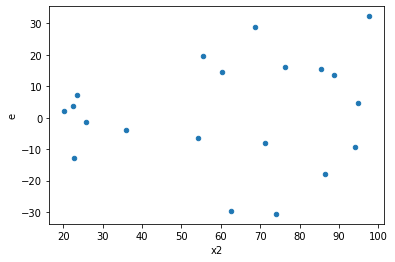

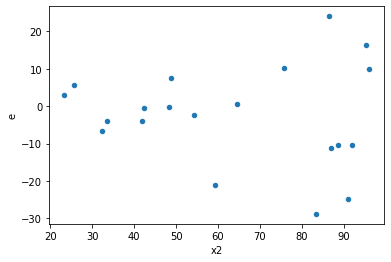

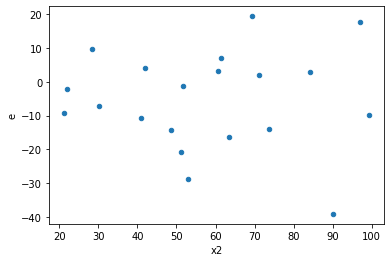

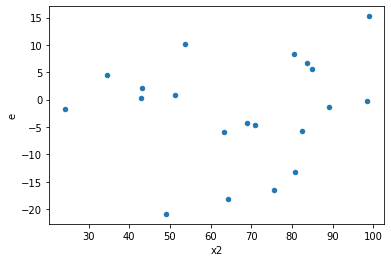

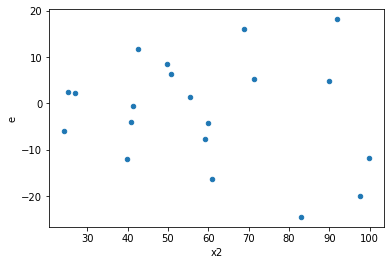

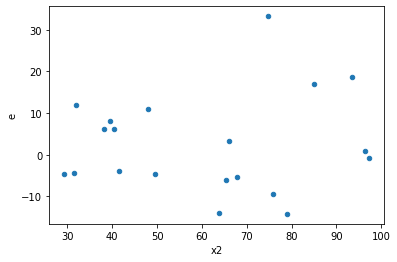

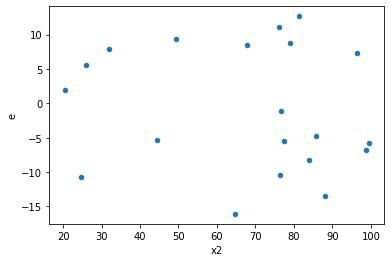

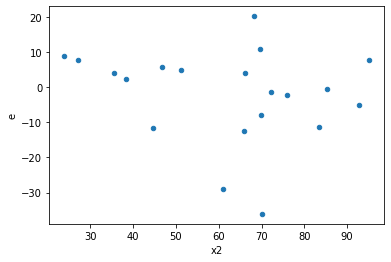

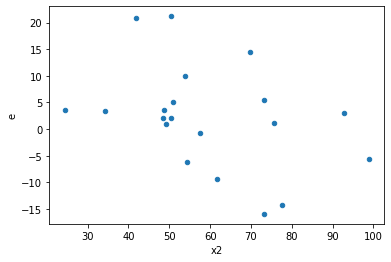

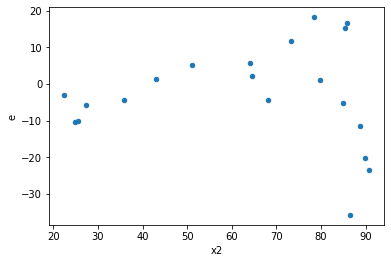

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[['x1', 'x2', 'x3', 'x4']]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,6.0,6.0,154.554816305746,1518.7027192049977,25.759136050957665,253.1171198674996,9.826304708619656,0.013658145103611297,0.9931709274481944,0.006829072551805648,Reject001=1 : Homoscedasticity
3.0,9.0,3.0,392.67057944698075,306.48773077801786,43.63006438299786,102.16257692600595,2.3415637444215545,0.5230401469997759,0.7384799265001121,0.26152007349988793,Reject001=1 : Homoscedasticity
4.0,9.0,3.0,559.1863071347775,233.8927834352605,62.13181190386417,77.96426114508684,1.2548203368947302,0.9480877943895272,0.5259561028052364,0.4740438971947636,Reject001=1 : Homoscedasticity
6.0,3.0,9.0,93.18747465043562,876.2136723448357,31.062491550145207,97.35707470498174,3.1342326338444226,0.16002104821225016,0.9199894758938749,0.08001052410612508,Reject001=1 : Homoscedasticity
8.0,2.0,10.0,142.27389547919358,658.8128082648453,71.13694773959679,65.88128082648453,0.926119027030073,0.855122171321161,0.5724389143394195,0.4275610856605805,Reject001=1 : Homoscedasticity
9.0,9.0,3.0,1177.9656632517392,894.3829728128873,130.8850736946377,298.12765760429573,2.2777819440270513,0.538741294009548,0.730629352995226,0.269370647004774,Reject001=1 : Homoscedasticity
13.0,2.0,10.0,118.28315512873043,2490.5320365056346,59.141577564365214,249.05320365056346,4.211135615709825,0.09425711329000741,0.9528714433549963,0.047128556645003705,Reject001=1 : Homoscedasticity
14.0,5.0,7.0,286.0993626268431,1340.763960758401,57.21987252536862,191.53770867977158,3.347398381477566,0.1464866812117538,0.9267566593941231,0.0732433406058769,Reject001=1 : Homoscedasticity
15.0,4.0,8.0,207.09781770732448,1286.590835198526,51.77445442683112,160.82385439981576,3.106239480072085,0.16160532335135924,0.9191973383243204,0.08080266167567962,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,6.0,6.0,2346.5815527371374,1967.020844037552,391.0969254561896,327.836807339592,0.8382495131026441,0.8358653971200316,Reject001=1 : Homoscedasticity
1.0,6.0,6.0,154.554816305746,1518.7027192049977,25.759136050957665,253.1171198674996,9.826304708619656,0.013658145103611297,Reject001=1 : Homoscedasticity
2.0,4.0,8.0,547.4919378332419,825.3315063105501,136.87298445831047,103.16643828881877,0.7537385021383951,0.834227290065238,Reject001=1 : Homoscedasticity
3.0,9.0,3.0,392.67057944698075,306.48773077801786,43.63006438299786,102.16257692600595,2.3415637444215545,0.5230401469997759,Reject001=1 : Homoscedasticity
4.0,9.0,3.0,559.1863071347775,233.8927834352605,62.13181190386417,77.96426114508684,1.2548203368947302,0.9480877943895272,Reject001=1 : Homoscedasticity
5.0,8.0,4.0,1613.357948793957,539.164894003867,201.6697435992446,134.79122350096674,0.6683760344775468,0.5808138866529373,Reject001=1 : Homoscedasticity
6.0,3.0,9.0,93.18747465043562,876.2136723448357,31.062491550145207,97.35707470498174,3.1342326338444226,0.16002104821225016,Reject001=1 : Homoscedasticity
7.0,8.0,4.0,1977.7395032304755,553.8598358597942,247.21743790380944,138.46495896494855,0.5600938191861057,0.4498692884400401,Reject001=1 : Homoscedasticity
8.0,2.0,10.0,142.27389547919358,658.8128082648453,71.13694773959679,65.88128082648453,0.926119027030073,0.855122171321161,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      871
Reject001=0 : Heteroscedasticity    129
Name: Result_test, dtype: int64